In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")
X = data.drop(columns=['diagnosis'])  # Features
y = data['diagnosis']  # Target (M = malignant, B = benign)

# Convert labels to binary (0 for benign, 1 for malignant)
y = y.map({'B': 0, 'M': 1})

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA (reduce to 5 components for quantum-inspired approach)
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [3]:
# Classical Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_pca, y_train)
y_pred_rf = clf_rf.predict(X_test_pca)

# Evaluate
print("Classical Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Classical Random Forest Performance:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
[[68  3]
 [ 2 41]]
Accuracy: 0.956140350877193


In [4]:
def quantum_feature_map(X):
    return np.column_stack((np.sin(X), np.cos(X), X**2, np.exp(-X**2)))

In [5]:
def quantum_kernel(X1, X2):
    Phi_X1 = quantum_feature_map(X1)
    Phi_X2 = quantum_feature_map(X2)
    return Phi_X1 @ Phi_X2.T  # Gram matrix

In [6]:
# Compute quantum kernel matrices
K_train = quantum_kernel(X_train_pca, X_train_pca)
K_test = quantum_kernel(X_test_pca, X_train_pca)

# Train Random Forest on the quantum kernel
qrf = RandomForestClassifier(n_estimators=100, random_state=42)
qrf.fit(K_train, y_train)
y_pred_qrf = qrf.predict(K_test)

# Evaluate
print("\nQuantum-Inspired Random Forest Performance:")
print(classification_report(y_test, y_pred_qrf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_qrf))
print("Accuracy:", accuracy_score(y_test, y_pred_qrf))


Quantum-Inspired Random Forest Performance:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        71
           1       0.71      0.63      0.67        43

    accuracy                           0.76       114
   macro avg       0.75      0.74      0.74       114
weighted avg       0.76      0.76      0.76       114

Confusion Matrix:
[[60 11]
 [16 27]]
Accuracy: 0.7631578947368421


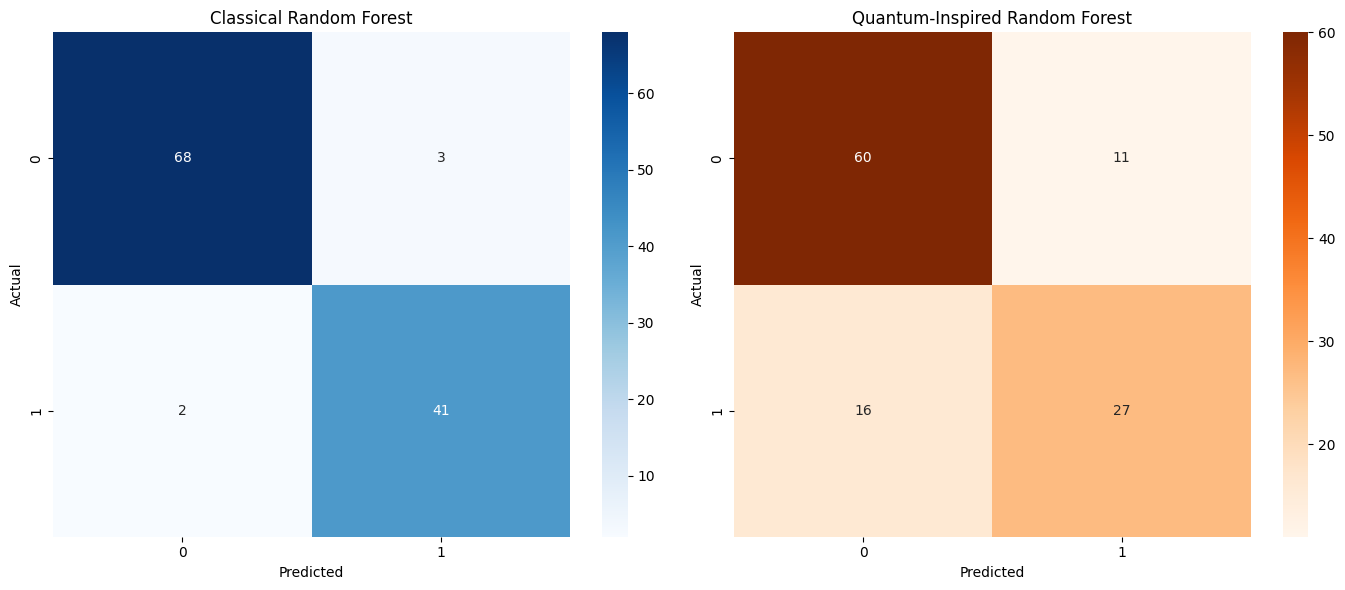

In [7]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Classical Random Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_qrf), annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('Quantum-Inspired Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()